In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [6]:
revenue = np.array([2.6, 19. , 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [8]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

,revenue,budget
0,2.6,5
1,19.0,10
2,23.8,17
3,26.9,27
4,41.1,35
5,58.3,40
6,40.3,42
7,58.7,49
8,73.1,54
9,69.7,60


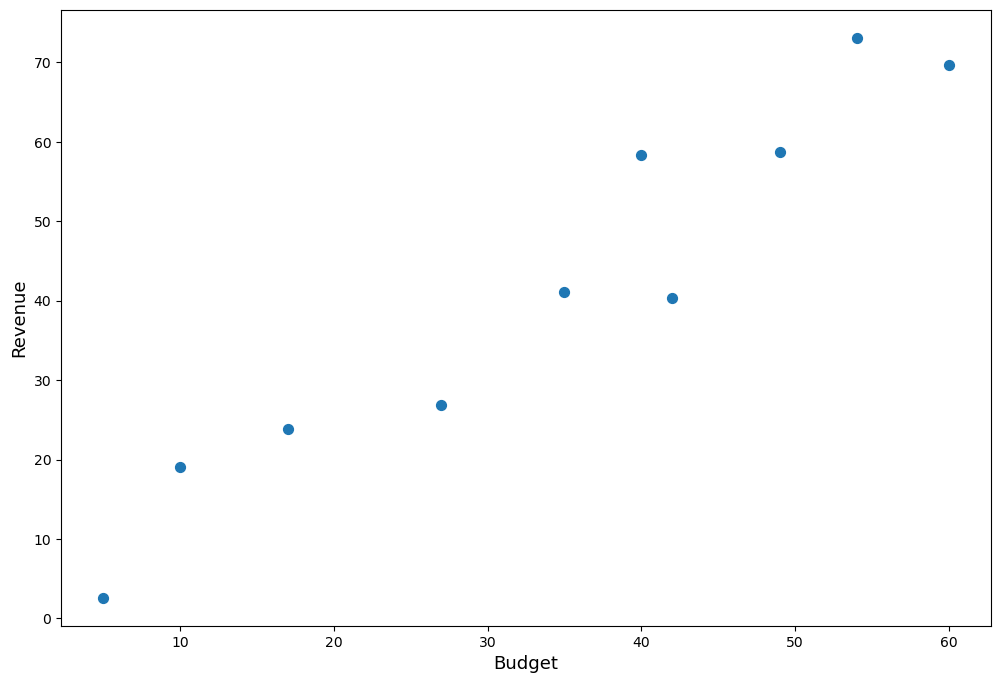

In [10]:
# Scatter plot
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

Linear Relationship between Budget and Revenue:

In [13]:
from sklearn.linear_model import LinearRegression # machine learning model for linear regression

In [15]:
lm = LinearRegression(fit_intercept = True)

In [17]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # fitting the model

LinearRegression()

In [19]:
slope = lm.coef_ # the slope of regression
slope

array([1.19897684])

In [21]:
intercept = lm.intercept_
intercept

0.7046849757673783

In [23]:
df["pred"] = lm.predict(df.budget.to_frame())
df

,revenue,budget,pred
0,2.6,5,6.699569
1,19.0,10,12.694453
2,23.8,17,21.087291
3,26.9,27,33.077060
4,41.1,35,42.668875
5,58.3,40,48.663759
6,40.3,42,51.061712
7,58.7,49,59.454550
8,73.1,54,65.449435
9,69.7,60,72.643296


In [25]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

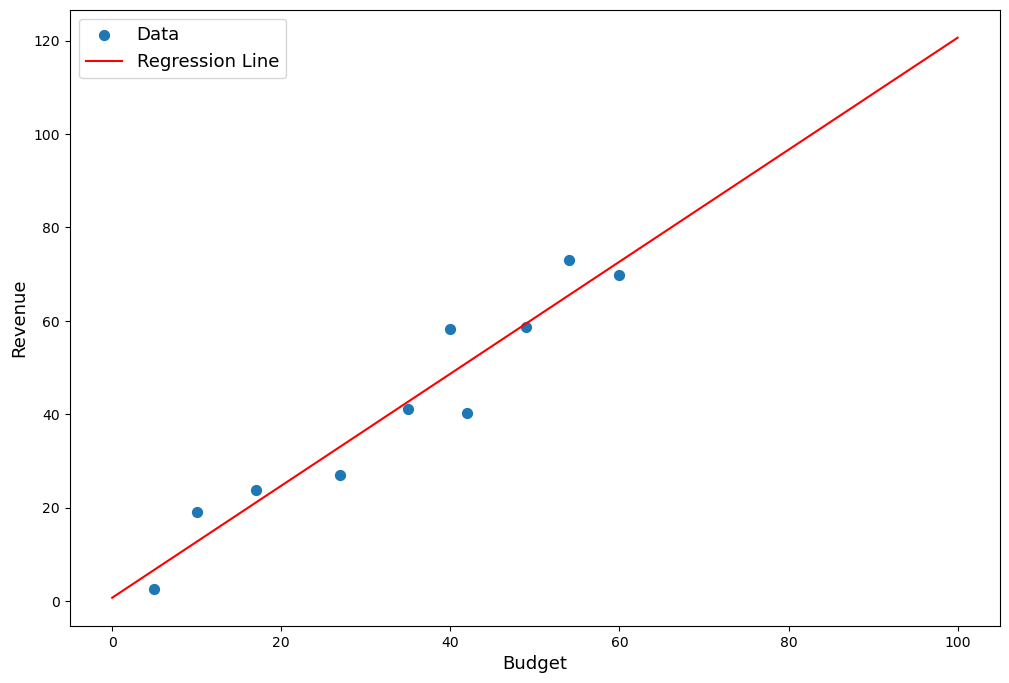

In [27]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

//////////////////////////////

Making Predictions with Linear Regresion

new movies (observations / data points)

In [32]:
budget_new = np.array([63, 66, 74, 80, 85])

In [34]:
revenue_new = np.array([74.2, 80.7, 98.2, 94.8, 101.7])

In [36]:
df_new = pd.DataFrame(data = {"revenue": revenue_new, "budget":budget_new})
df_new

,revenue,budget
0,74.2,63
1,80.7,66
2,98.2,74
3,94.8,80
4,101.7,85


In [38]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

,revenue,budget,pred
0,74.2,63,76.240226
1,80.7,66,79.837157
2,98.2,74,89.428971
3,94.8,80,96.622833
4,101.7,85,102.617717


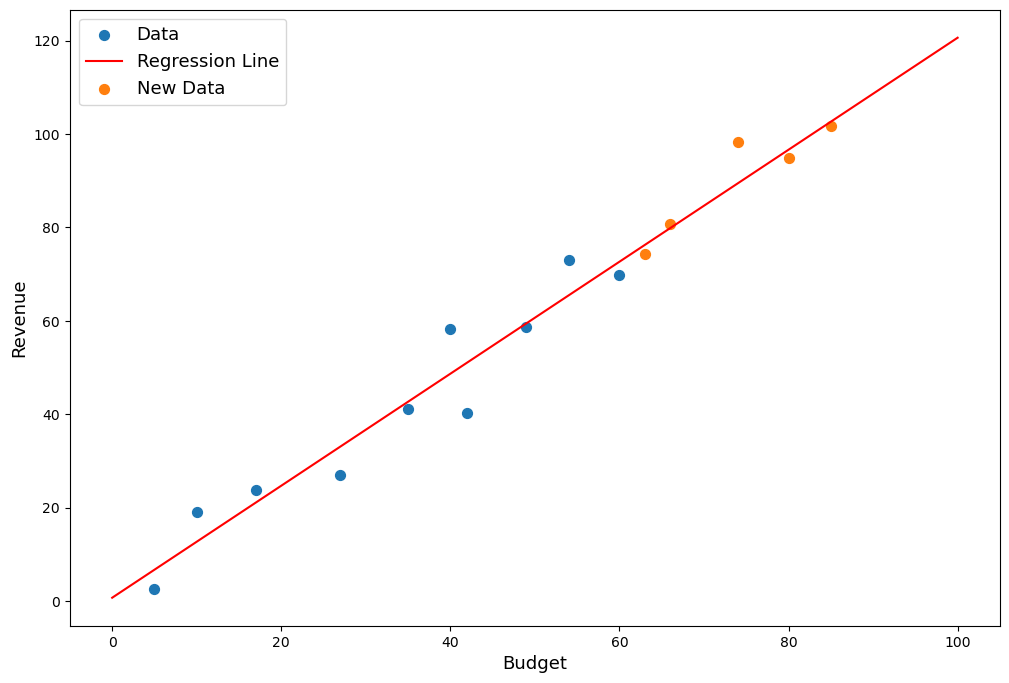

In [40]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data") # predict new data points
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

//////////////////////////////////////

Overfitting

In [44]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9)

In [46]:
poly_m

array([ 2.31988761e-09, -6.91663857e-07,  8.80409588e-05, -6.24271102e-03,
        2.69731803e-01, -7.29512946e+00,  1.21996447e+02, -1.19724559e+03,
        6.13254339e+03, -1.21710591e+04])

In [48]:
x_poly = np.linspace(0, 100, 1000) # x and y values for polynomial regression line/curve

In [50]:
y_poly = np.polyval(poly_m, x_poly)

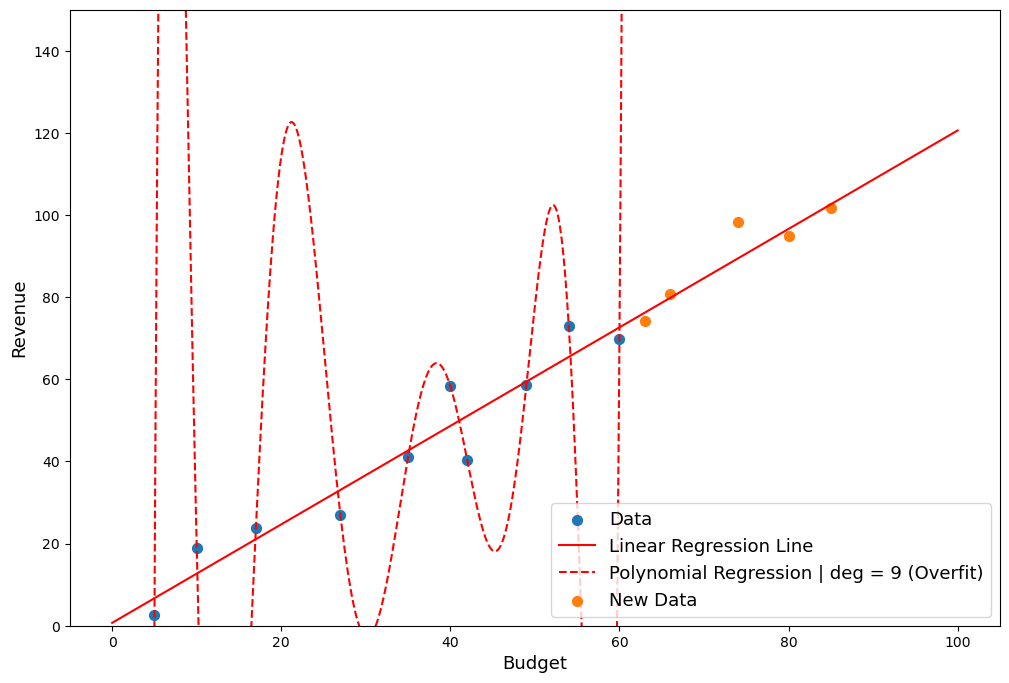

In [52]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)", linestyle = "--", color = "red")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data") # predict new data points
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13, loc = 4)
plt.ylim(0, 150)
plt.show()

/////////////////////////////

Underfitting

In [56]:
mean = df.revenue.mean()
mean

41.35000000000001

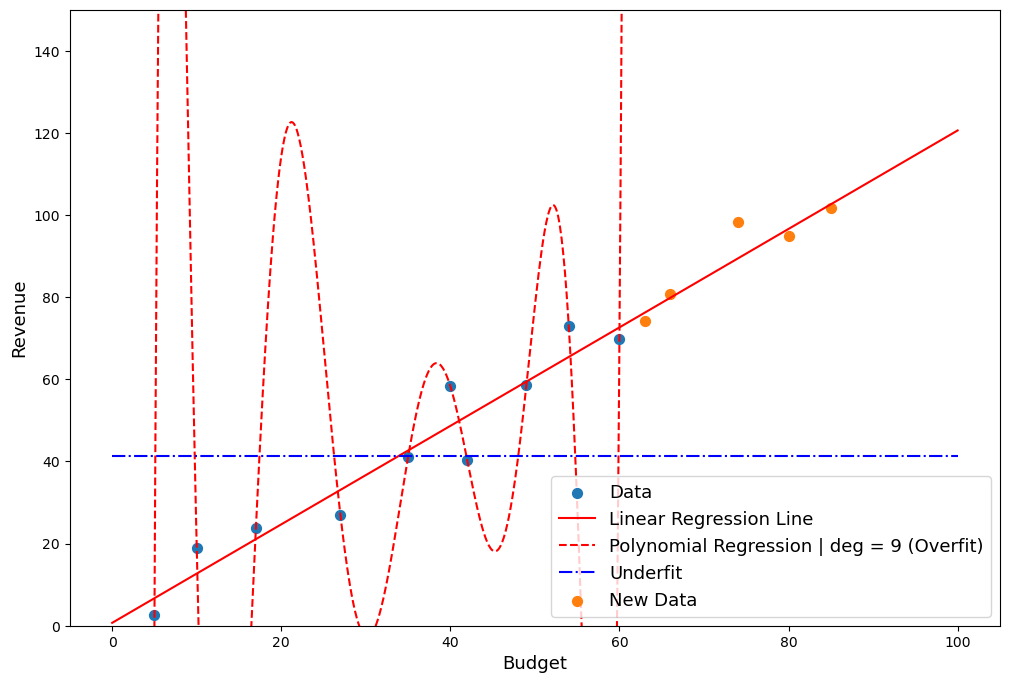

In [58]:
plt.figure(figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)", linestyle = "--", color = "red")
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = "-.", color = "blue", label = "Underfit")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data") # predict new data points
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13, loc = 4)
plt.ylim(0, 150)
plt.show()

/////////////////////////////////////////

A Multiple Regression Model to predict Finiancial Returns

In [62]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [66]:
data.dropna(inplace = True)

In [68]:
data["returns"] = np.log(data.div(data.shift(1)))

In [70]:
lags = 5

In [72]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [74]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [76]:
cols

['lag1', 'lag2', 'lag3', 'lag4', 'lag5']

In [78]:
lm = LinearRegression(fit_intercept = True)

In [80]:
lm.fit(data[cols], data.returns) # the lm model

LinearRegression()

In [82]:
lm.coef_

array([-0.03358358, -0.00243139,  0.00365238, -0.00366896, -0.00360391])

In [84]:
lm.intercept_

-3.278292441995065e-07

In [86]:
data["pred"] = lm.predict(data[cols].values)

C:\Users\audri\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
data.pred = np.sign(data.pred)

In [90]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


In [92]:
data.pred.value_counts()

pred
-1.0    39610
 1.0    34104
Name: count, dtype: int64

In [94]:
hits = np.sign(data.returns * data.pred).value_counts() # sucssesffull trades
hits

 1.0    37493
-1.0    34263
 0.0     1958
Name: count, dtype: int64

In [96]:
hit_ratio = hits[1.0] / sum(hits) # trade ratio
hit_ratio

0.5086279404183737

In-Sample Backtesting and the Look-ahead-bias

In [100]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-0.000004,-0.000112,-0.000018,0.000022,-1.0


In [102]:
data["strategy"] = data.pred * data.returns

In [104]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

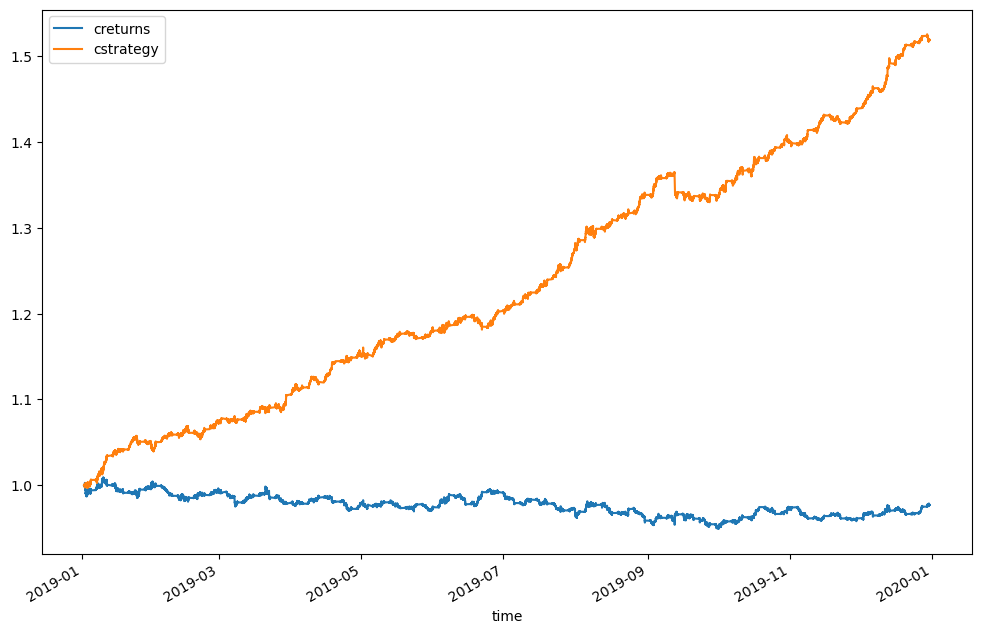

In [106]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [110]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [112]:
data.trades.value_counts()

trades
0.0    37100
2.0    36614
Name: count, dtype: int64

//////////////////////////////////

Out-Sample Forward Testing

In [134]:
data = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")

In [136]:
data 

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [140]:
data["returns"] = np.log(data.div(data.shift(1)))

In [142]:
data

,price,returns
time,,
2020-01-01 22:00:00+00:00,1.121325,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067
2020-01-01 22:10:00+00:00,1.121250,0.000000
2020-01-01 22:15:00+00:00,1.121460,0.000187
2020-01-01 22:20:00+00:00,1.121540,0.000071
...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080
2020-08-30 23:40:00+00:00,1.191240,0.000290
2020-08-30 23:45:00+00:00,1.191515,0.000231


In [144]:
lags = 5

In [146]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [148]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5
time,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022
...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046


In [150]:
data["pred"]= lm.predict(data[cols].values)

C:\Users\audri\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [152]:
data

,price,returns,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,-0.000022,0.000071,0.000187,0.000000,-0.000067,1.172394e-06
2020-01-01 22:45:00+00:00,1.121555,0.000031,0.000004,-0.000022,0.000071,0.000187,0.000000,-8.499182e-07
2020-01-01 22:50:00+00:00,1.121550,-0.000004,0.000031,0.000004,-0.000022,0.000071,0.000187,-2.404767e-06
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-0.000004,0.000031,0.000004,-0.000022,0.000071,-4.129965e-07
2020-01-01 23:00:00+00:00,1.121915,0.000357,-0.000031,-0.000004,0.000031,0.000004,-0.000022,9.090211e-07
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151,2.762520e-06
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000,3.494904e-06
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.145903e-05


In [154]:
data.pred = np.sign(data.pred)

In [156]:
data.pred.value_counts()

pred
-1.0    26143
 1.0    23218
Name: count, dtype: int64

In [158]:
hits = np.sign(data.returns * data.pred).value_counts()

In [160]:
hits

 1.0    24995
-1.0    23754
 0.0      612
Name: count, dtype: int64

In [162]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5063714268349506

In [164]:
data["strategy"] = data.pred * data.returns

In [166]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

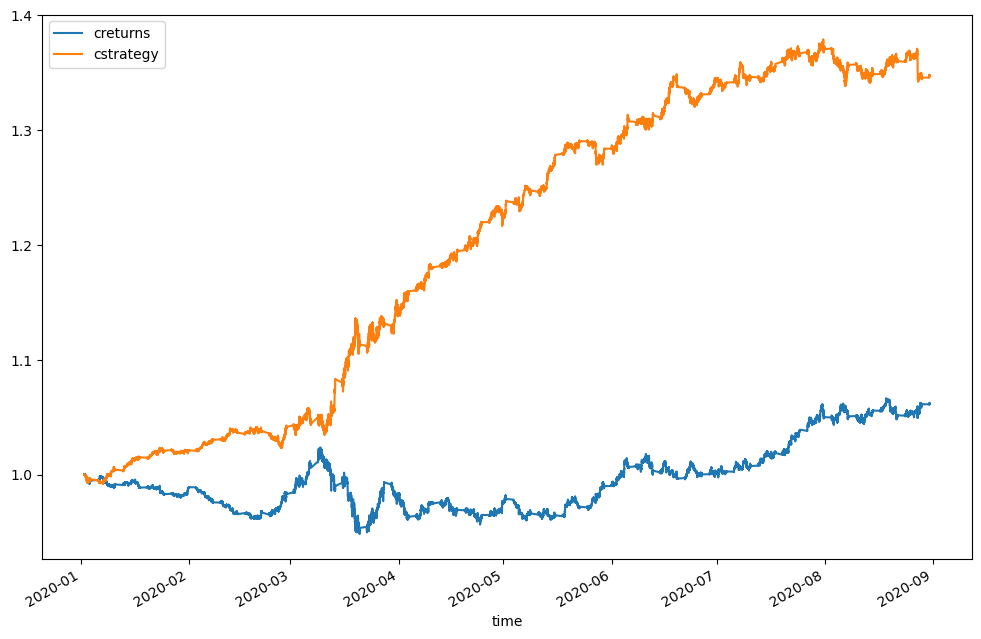

In [168]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8))
plt.show()

In [170]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [172]:
data.trades.value_counts()

trades
0.0    25190
2.0    24171
Name: count, dtype: int64